In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


In [9]:
df = pd.read_csv("data.csv", index_col = 0)
df.head()

,f1,f2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


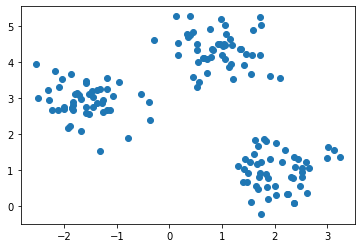

In [10]:
plt.scatter(df.f1, df.f2)
plt.show()

In [ ]:
#-> du lieu co cac range gan nhau, khong can scale

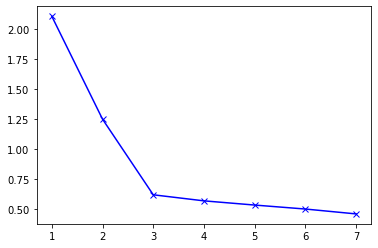

In [5]:
#lua chon so nhom de phan cum
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / df.shape[0])

plt.plot(K, distortions, 'bx-')
plt.show()
    

In [ ]:
#-> chon k bang 3

In [7]:
kmeans = KMeans(n_clusters= 3)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 0.9329651   4.35420712]
 [ 2.06521743  0.96137409]
 [-1.5947298   2.92236966]]
[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


In [13]:
df['Group'] = pd.Series(labels)
df.head()

,f1,f2,Group
0,2.605097,1.225296,1
1,0.532377,3.313389,0
2,0.802314,4.381962,0
3,0.528537,4.497239,0
4,2.618585,0.357698,1


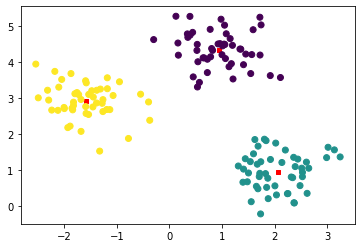

In [14]:
plt.scatter(centroids[:,0], centroids[:,1], marker='s', s = 15, color='red')
plt.scatter(df.f1, df.f2, c = df.Group)

* Nhóm 1 co f1 < 0 và f2 < 4
* Nhóm 2 co f >= 0 và f2 > 3
* Nhóm 3 co f1 > 1 và f2 < 2